# Differencing of a time series


---





#### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SALES.csv to SALES.csv


In [3]:
path = 'SALES.csv'
df = pd.read_csv(path)
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y")
df.set_index("Month", inplace=True)
df.head()

,Value
Month,
1970-07-01,13083.53632
1970-08-01,13531.51129
1970-09-01,14066.18983
1970-10-01,14432.95079
1970-11-01,15163.54335


### Plotting the data

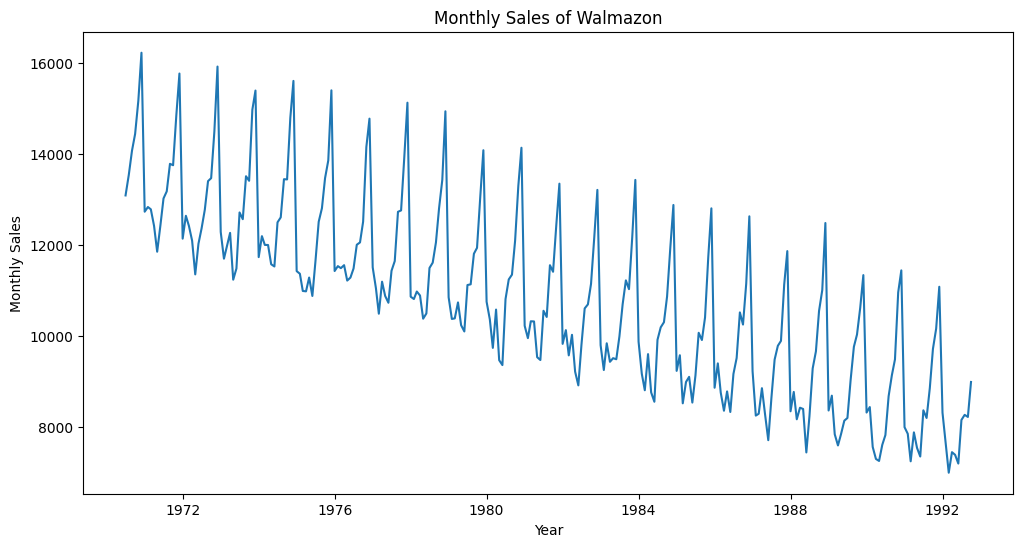

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel("Year")
plt.ylabel("Monthly Sales")
plt.title("Monthly Sales of Walmazon")
plt.show()

# Task 1
From the plot, we can see that there is a clear seasonality in the data, as there is a repetitive pattern that occurs each year. Also, there appears to be a trend in the data, with the monthly sales decreasing over time.

To confirm the presence of seasonality and trend, we can perform a decomposition of the time series into its trend, seasonal, and residual components.

### Seasonality using decomposition

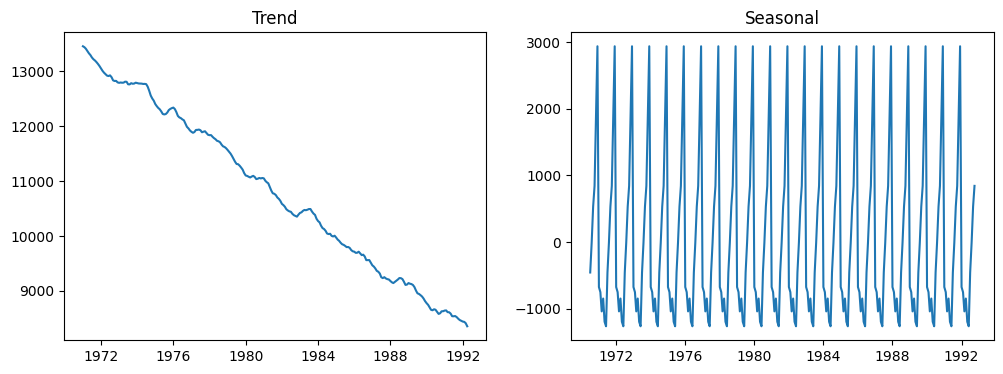

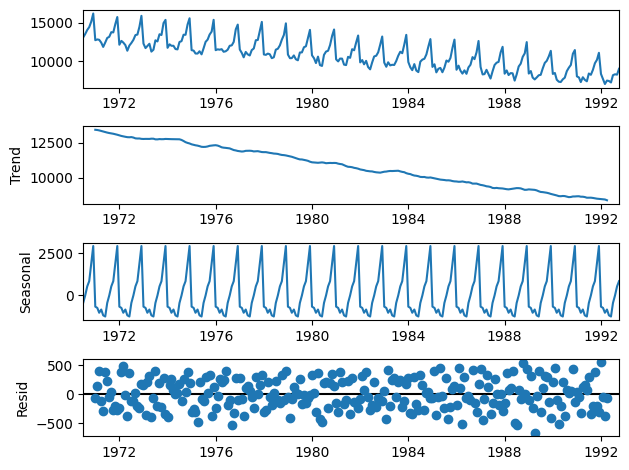

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, period=12)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].plot(decomposition.trend)
ax[0].set_title("Trend")
ax[1].plot(decomposition.seasonal)
ax[1].set_title("Seasonal")

plt.show()

result = seasonal_decompose(df, model="additive")
result.plot()
plt.show()

From the plot, we can confirm the presence of both seasonality and trend in the data. The seasonal component shows a clear repetitive pattern that occurs each year, while the trend component shows a clear increasing pattern over time.

Therefore, we can conclude that the monthly sales are not totally independent of the date, as there is both seasonality and trend in the data.

# Task 2
Performing seasonal difference on the time series to see if the seasonality is eliminated

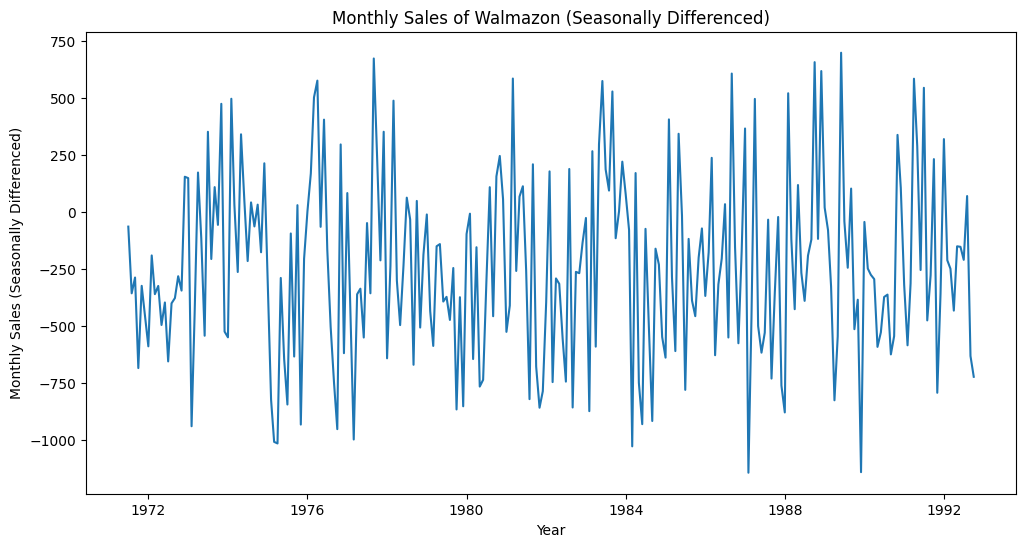

In [10]:
diff = df.diff(12)
diff.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(diff)
plt.xlabel("Year")
plt.ylabel("Monthly Sales (Seasonally Differenced)")
plt.title("Monthly Sales of Walmazon (Seasonally Differenced)")
plt.show()

From the plot, we can see that the seasonality appears to have been eliminated, as there is no longer a clear repetitive pattern that occurs each year but rather more randomized data. However there still could be some form of trend but not a clear one.
We can conclude that a single attempt at differencing is able to eliminate the seasonality in the data.

# Task 3
Regression analysis on time series to see if there is a linear or non-linear trend

In [14]:
import statsmodels.api as sm

X = range(len(df))
X = sm.add_constant(X)
y = df["Value"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     401.8
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           4.27e-55
Time:                        11:36:16   Log-Likelihood:                -2298.5
No. Observations:                 268   AIC:                             4601.
Df Residuals:                     266   BIC:                             4608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.355e+04    156.970     86.343      0.0

From the report generated by the code above we can se that the R-Squared values is aprox 0.602. This means a aprox 60.2% variability in the dependent variable. In the context of linear regression R-squarde value of 0.602 could indicate a moderatly strong relationship between the independent and dependent variables with some unexplained variance.

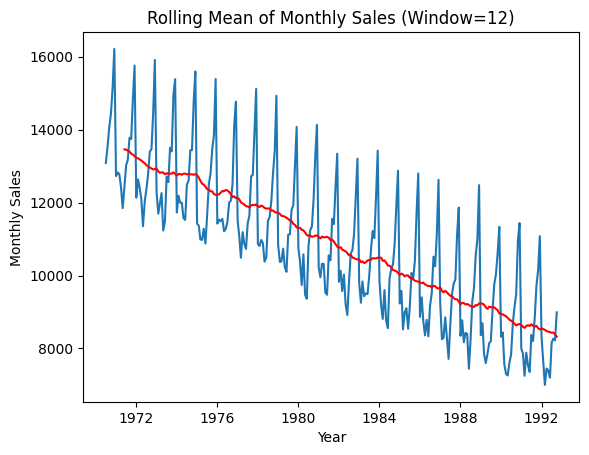

In [16]:
rolling_mean = df.rolling(window=12).mean()
plt.plot(df)
plt.plot(rolling_mean, color='red')
plt.xlabel('Year')
plt.ylabel('Monthly Sales')
plt.title('Rolling Mean of Monthly Sales (Window=12)')
plt.show()

With this illustration the result is a bit clearer. Here we can see that the rolling mean (with a window of 12) shows the almost linear trend. As previously mentioned there are som disturbances, but all in all i would say the trend is quite linear. Perhaps some further analysis could give even better results.



---



# Bonus

---






Starting of this is quite a difficult question. Immediatly when looking at the graph it seems to be quite random. There does seem to be som slight upward trend judging by the density of the datapoints. I'll admit that the circular patterns drawn by the "expert" seem to be hitting quite many data points, but I'm not sure how this would translate into proof of seasonality. My gut instinct is to refute the observations. I can't however quite explain why the patterns are highlighted by the expert, this could ofcourse be some form of technique which I am not familiar with. The observations also seem to be quite distant from each other with varying sizes which also confuses me.
But considering I'm not familiar with this, I will go with my gut instinct and state that I refute the observations made by the expert.